# Lab3

In [3]:
import os

texts = {}

for writer in os.listdir(r"/home/valeriya/Downloads/Lab3/"):
    textNames = os.listdir(r"/home/valeriya/Downloads/Lab3/" + writer)
    texts.update({writer: textNames})

writers = list(texts.keys())

print(writers)

['Zamyatin', 'Foer', 'Wonnegut', 'Golding', 'Oruell']


Выводим список произведений по авторам:

In [4]:
print(texts)

{'Zamyatin': ['ТРИ ДНЯ.txt', 'НА КУЛИЧИКАХ.txt', 'МЫ.txt'], 'Foer': ['Вот я.txt', 'Мясо. Eating Animals.txt', 'Жутко громко и запредельно близко.txt'], 'Wonnegut': ['Сирены Титана.txt', 'Синяя Борода.txt', 'Бойня.txt'], 'Golding': ['Свободное падение.txt', 'Повелитель мух.txt', 'Негасимое пламя.txt'], 'Oruell': ['1984.txt', 'СКОТНЫЙ ДВОР.txt', 'ДОЧЬ СВЯЩЕННИКА.txt']}


Функция для разбиения входных текстов на части по n символов:

In [5]:
import itertools
def grouper(n, iterable):
    args = [iter(iterable)] * n
    return list("".join([e for e in t if e != None]) for t in itertools.zip_longest(*args))

Загружаем тексты:

In [8]:
data = []
label_list = []
for writer in writers:
    books = []
    for text in texts[writer]:
        with open(r"/home/valeriya/Downloads/Lab3/" + writer + "//" + text) as bookFile:
            book = bookFile.read().replace('\n', ' ').replace('\xa0', ' ')
            for b in grouper(100000, book):
                books.append(b)
                label_list.append(writer + '_' + text[:-4])
    data.append(books)

Загрузка необходимых для работы с текстами модулей:

In [13]:
import spacy
nlp = spacy.load(r"/home/valeriya/Downloads/spacy-ru-master/ru2")

In [17]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /home/valeriya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Разобьём по предложениям:

In [18]:
sent_tokenize_list = sent_tokenize(data[0][0])

Посмотрим на результат разделения по предложениям:

In [19]:
for sent_index, sent in enumerate(sent_tokenize_list[:50]):
    print("#{}:{}".format(sent_index, sent))

#0:﻿ Евгений Замятин Три дня  Солнце, песок, черномазые арабы, песок, верблюды, пальмы, песок, кактусы.
#1:Где-нибудь в другом месте не арабы, а турки, и опять – солнце, верблюды, песок.
#2:Повсюду одинаково звонко, ослепительно-ярко.
#3:И вечный шелковый шум волн при переезде из порта в порт, – этим шелком закутаны глаза, уши.
#4:Под конец совсем падаешь под тяжестью впечатлений, сквозь шелк все уже еле видно, еле слышно.
#5:Всякие разговоры начинаются с одного: «А вот, когда мы придем в Одессу … » И наконец – пришли.
#6:Солнце садится, значит – опоздали: таможенный досмотр будет только завтра, а до тех пор на берег нельзя.
#7:– Полюбуйтесь-ка вот, издали.
#8:Близок локоток, а не укусишь, – подхихикивает старший механик.
#9:Борода у него седая, длинная, как у Моисея-пророка; медленно ее поглаживает.
#10:Шум улиц легко бежит к нам по воде.
#11:Золотеет над городом облако пыли.
#12:Вспыхнули красным верхушки наших мачт, стекла в иллюминаторах.
#13:Погасли.
#14:Темнеет.
#15:Два белых вое

Напишем функцию, которая парсит по одному предложению и выводит некоторую информацию:

In [20]:
def parse_one_sentence(one_sentence):
    doc = nlp(one_sentence)
    for token in doc:
        print('{} \ {} \ {} \ {} \ {} \ {}'.format(
            token.text, 
            token.lemma_,
            token.pos_, 
            token.tag_, 
            token.dep_, 
            token.head.text
        ))



Теперь проведем анализ для каждого из предложений:

In [21]:
for sent_index, sent in enumerate(sent_tokenize_list[:5]):
    print("Sentence #{}\t{}".format(sent_index,sent))
    parse_one_sentence(sent)
    print('\n\n')

Sentence #0	﻿ Евгений Замятин Три дня  Солнце, песок, черномазые арабы, песок, верблюды, пальмы, песок, кактусы.
﻿ \ ﻿ \ NOUN \ NOUN__Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing \ ROOT \ ﻿
Евгений \ евгений \ PROPN \ PROPN__Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing \ nsubj \ ﻿
Замятин \ замятин \ PROPN \ PROPN__Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing \ flat:name \ Евгений
Три \ три \ NUM \ NUM__Animacy=Inan|Case=Acc \ nummod:gov \ дня
дня \ день \ NOUN \ NOUN__Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing \ obl \ ﻿
  \   \ SPACE \  \  \ дня
Солнце \ солнце \ PROPN \ PROPN__Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing \ parataxis \ дня
, \ , \ PUNCT \ PUNCT___ \ punct \ песок
песок \ песок \ NOUN \ NOUN__Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing \ conj \ дня
, \ , \ PUNCT \ PUNCT___ \ punct \ черномазые
черномазые \ черномазый \ ADJ \ ADJ__Case=Nom|Degree=Pos|Number=Plur \ conj \ дня
арабы \ арабы \ NOUN \ NOUN__Animacy=Inan|Case=Acc|Gender=Masc|Number=Plur \ iobj \ черн

Используем одно из предложений:

In [22]:
sent_tokenize_list[353]

'Взобрался по трапу, поглаживает длинную, как у Моисея-пророка, бороду: – Еле-еле пробрался к вам.'

Выводим семантическое дерево:

In [23]:
doc = nlp(sent_tokenize_list[353])

from nltk import Tree

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

to_nltk_tree(list(doc.sents)[0].root).pretty_print()

                                          Взобрался                                         
   ___________________________________________|____________________________                  
  |       поглаживает                                                      |                
  |     _______|_____________                                              |                 
  |    |                  длинную                                          |                
  |    |                     |                                             |                 
  |    |                   Моисея                                      пробрался            
  |    |        _____________|________________________           __________|______________   
трапу  |       |       |     |    пророка           бороду      |   |             –      вам
  |    |       |       |     |       |         _______|_____    |   |       ______|___    |  
  по   ,       ,      как    у       -        ,             :  ел

In [24]:
def attr(doc):
    out = {'sentSize': len(doc)}
    for word in doc:
        if word.dep_ =='ROOT': out.update({'rootChild': len(list(word.children))})

    import json

    def depth(jsn):
        if 'modifiers' in jsn.keys():
            return 1 +  max([0] + list(map(depth, jsn['modifiers'])))
        else:
            return 1

    j = json.loads(str(doc.print_tree()[0]).replace('\'', "\""))
    out.update({'depthTree': depth(j)})
    return out

In [25]:
doc

Взобрался по трапу, поглаживает длинную, как у Моисея-пророка, бороду: – Еле-еле пробрался к вам.

In [26]:
attr(doc)

{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}

Вычисление числа встречающихся в тексте различных трилетов (используются топ-10 из наиболее встречаемых трилетов):

In [27]:
from itertools import combinations

def treelets(data, topN=10):
    one_gram_treelet = {}
    two_gram_treelet = {}
    three_gram_treelet = {}
    for sent in sent_tokenize(data):
        doc = nlp(sent)

        for token in doc:
            key = token.pos_
            one_gram_treelet.update({key: one_gram_treelet.get(key, 0) + 1})

            key = (token.head.pos_, token.dep_, token.pos_)
            two_gram_treelet.update({key: two_gram_treelet.get(key, 0) + 1})

            for (left_child, right_child) in combinations(token.children, 2):
                if left_child.dep_ != 'punct' and right_child.dep_ != 'punct':
                    key = (1, left_child.pos_, left_child.dep_, token.pos_, right_child.dep_, right_child.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
            if token.dep_ != 'ROOT':
                for child in token.children:
                    if child.dep_ == 'punct' or token.dep_ == 'punct':
                        continue
                    key = (2, child.pos_, child.dep_, token.pos_, token.dep_, token.head.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
                    
    import operator
    sorted_1gram_treelet = {}
    from collections import OrderedDict
    from operator import itemgetter
    sorted_1gram_treelet = dict((sorted(one_gram_treelet.items(), key=itemgetter(1)))[-topN:])  
    sorted_2gram_treelet = dict((sorted(two_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    sorted_3gram_treelet = dict((sorted(three_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    return (len(sent_tokenize(data)), sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet)

In [28]:
(numOfSents, sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet) = treelets(data[0][0])
print(numOfSents)
print(sorted_1gram_treelet)

622
{'PROPN': 193, 'CCONJ': 231, 'PRON': 355, 'PART': 382, 'ADV': 471, 'ADP': 523, 'ADJ': 555, 'VERB': 915, 'NOUN': 1287, 'PUNCT': 2006}


In [29]:
print(sorted_2gram_treelet)
print(list(sorted_2gram_treelet.keys()))

{('ADJ', 'punct', 'PUNCT'): 179, ('VERB', 'conj', 'VERB'): 191, ('VERB', 'nsubj', 'NOUN'): 205, ('VERB', 'advmod', 'ADV'): 219, ('NOUN', 'amod', 'ADJ'): 265, ('VERB', 'obl', 'NOUN'): 313, ('VERB', 'ROOT', 'VERB'): 387, ('NOUN', 'case', 'ADP'): 400, ('NOUN', 'punct', 'PUNCT'): 417, ('VERB', 'punct', 'PUNCT'): 644}
[('ADJ', 'punct', 'PUNCT'), ('VERB', 'conj', 'VERB'), ('VERB', 'nsubj', 'NOUN'), ('VERB', 'advmod', 'ADV'), ('NOUN', 'amod', 'ADJ'), ('VERB', 'obl', 'NOUN'), ('VERB', 'ROOT', 'VERB'), ('NOUN', 'case', 'ADP'), ('NOUN', 'punct', 'PUNCT'), ('VERB', 'punct', 'PUNCT')]


In [30]:
print(sorted_3gram_treelet)

{(2, 'ADJ', 'amod', 'NOUN', 'nsubj', 'VERB'): 50, (1, 'VERB', 'conj', 'VERB', 'conj', 'VERB'): 52, (2, 'CCONJ', 'cc', 'VERB', 'conj', 'VERB'): 52, (2, 'ADJ', 'amod', 'NOUN', 'obl', 'VERB'): 54, (2, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 61, (2, 'ADP', 'case', 'NOUN', 'nmod', 'NOUN'): 64, (1, 'NOUN', 'nsubj', 'VERB', 'conj', 'VERB'): 69, (1, 'ADP', 'case', 'NOUN', 'amod', 'ADJ'): 74, (1, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 76, (2, 'ADP', 'case', 'NOUN', 'obl', 'VERB'): 226}


In [31]:
import pickle

# Анализ текстов по трилетам и сохранение полученных атрибутов для дальнейшего использования:

In [32]:
trByAuth = []
for authorTexts in data:
    trByText = []
    for text in authorTexts:
        trByText.append(treelets(text))
    trByAuth.append(trByText)        
with open('dataTr.pickle', 'wb') as f:
    pickle.dump(trByAuth, f)

In [33]:
with open('dataTr.pickle', 'rb') as f:
    trByAuth = pickle.load(f)

In [34]:
trAuth = []
for auth in trByAuth:
    trText = []
    for text in auth:
        numOfSent = 1
        numOfTreelets = list(map(lambda x: x/numOfSent, list(text[1].values()) + list(text[2].values()) + list(text[3].values())))
        trText.append(numOfTreelets)
    trAuth.append(trText)

K-Means кластеризация:

In [35]:
from sklearn.cluster import KMeans
Xtr = trAuth[0] + trAuth[1] + trAuth[2] + trAuth[3] + trAuth[4]

In [36]:
# костыль, у одного из списков не совпадает размер с остальными Т_Т
for lst in Xtr:
    if(len(lst) < 30):
        while(len(lst) < 30):
            lst.append(0)

Выбор оптимального числа классов:

In [37]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(Xtr)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

/home/valeriya/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


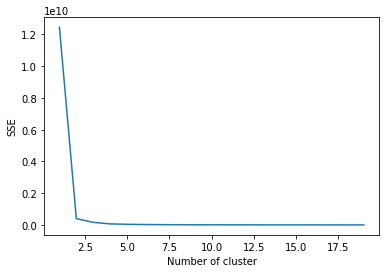

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Выберем число кластеров, равное 5 (по числу авторов):

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xtr)

Доля соответствия номера автора номеру кластера:

In [40]:
import numpy as np
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(trAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(trAuth[Nauth]))
    matches.append(clustMatches)

Матрица соответствия номера кластера номеру автора, номера строк - номера кластеров, столбцов - авторов. Столбец справа - номер столбца с максимальным значением (соответствует номеру автора, наиболее часто попадающего в данный кластер:


In [41]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.333333 0.166667 0.153846 0.250000 0.600000 4
0.000000 0.083333 0.000000 0.000000 0.000000 1
0.666667 0.583333 0.846154 0.750000 0.400000 2
0.000000 0.083333 0.000000 0.000000 0.000000 1
0.000000 0.083333 0.000000 0.000000 0.000000 1


Анализ текстов по атрибутам дерева, сохранение полученных атрибутов для дальнейшего использования:

In [42]:
attrsByAuth = []
for authorTexts in data:
    attrsByText = []
    for text in authorTexts:
        sents = sent_tokenize(text)
        attrBySent = []
        for sent in sents:
            doc = nlp(sent)
            try:
                attrBySent.append(attr(doc))
            except:
                pass
        attrsByText.append(attrBySent)
    attrsByAuth.append(attrsByText)
    with open('data.pickle', 'wb') as f:
        pickle.dump(attrsByAuth, f)

In [43]:
with open('data.pickle', 'rb') as f:
    attrsByAuth = pickle.load(f)

Средние значения и СКО атрибутов по авторам (для первого текста):

In [44]:
import numpy as np
for i in range(5):
    depthTreeMean = np.mean([sent['depthTree'] for sent in attrsByAuth[i][0]])
    depthTreeStd = np.std([sent['depthTree'] for sent in attrsByAuth[i][0]])
    print(depthTreeMean, depthTreeStd)


3.9701986754966887 1.4371280550531194
4.019471488178025 1.997817793904956
4.322347266881029 1.8343232422937945
4.663291139240506 1.8755934452268772
4.579464285714286 1.7543129705740905


Усреднение атрибутов по всем текстам каждого из авторов:

In [45]:
aAuth = []
for auth in attrsByAuth:
    aText = []
    for text in auth:
        x = [0,0,0]
        n = len(text)
        for sent in text:
            x[0] += sent['depthTree'] / n
            x[1] += sent['rootChild'] / n
            x[2] += sent['sentSize'] / n
        aText.append(x)
    aAuth.append(aText)

K-Means кластеризация:

In [46]:
X = np.array(aAuth[0] + aAuth[1] + aAuth[2] + aAuth[3] + aAuth[4])

Выбор оптимального числа классов:

In [47]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

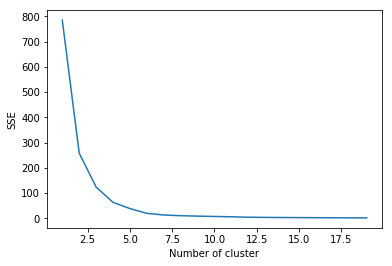

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [49]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

Доля соответствия номера автора номеру кластера:

In [50]:
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(aAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(aAuth[Nauth]))
    matches.append(clustMatches)

Матрица соответствия номера кластера номеру автора, номера строк - номера кластеров, столбцов - авторов. Столбец справа - номер столбца с максимальным значением (соответствует номеру автора, наиболее часто попадающего в данный кластер:

In [51]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.000000 0.250000 0.076923 0.000000 0.000000 1
0.166667 0.000000 0.461538 0.125000 1.000000 4
0.333333 0.416667 0.307692 0.875000 0.000000 3
0.000000 0.166667 0.000000 0.000000 0.000000 1
0.500000 0.166667 0.153846 0.000000 0.000000 0


Аналогичная кластеризация без усреднения по предложениям:

In [52]:
aAuthL = []
for auth in attrsByAuth:
    aText = []
    for text in auth:
        for sent in text:
            aText.append([ sent['depthTree'], sent['rootChild'], sent['sentSize'] ])
    aAuthL.append(aText)

In [53]:
XL = np.array(aAuthL[0] + aAuthL[1] + aAuthL[2] + aAuthL[3] + aAuthL[4])

Выбор оптимального числа классов:

In [54]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(XL)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

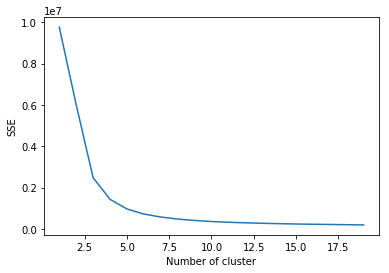

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [56]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(XL)

Доля соответствия номера автора номеру кластера:

In [57]:
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(aAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(aAuth[Nauth]))
    matches.append(clustMatches)



Матрица соответствия номера кластера номеру автора, номера строк - номера кластеров, столбцов - авторов. Столбец справа - номер столбца с максимальным значением (соответствует номеру автора, наиболее часто попадающего в данный кластер:

In [58]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.166667 0.250000 0.076923 0.375000 0.000000 3
0.000000 0.166667 0.000000 0.000000 0.000000 1
0.000000 0.000000 0.000000 0.000000 0.000000 0
0.833333 0.583333 0.923077 0.625000 1.000000 4
0.000000 0.000000 0.000000 0.000000 0.000000 0


In [59]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [60]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

Построение матрицы связи:

In [61]:
Z = linkage(Xtr, 'ward')

In [62]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(Xtr))
c

0.9790253257151291

Построение полной дендрограммы:

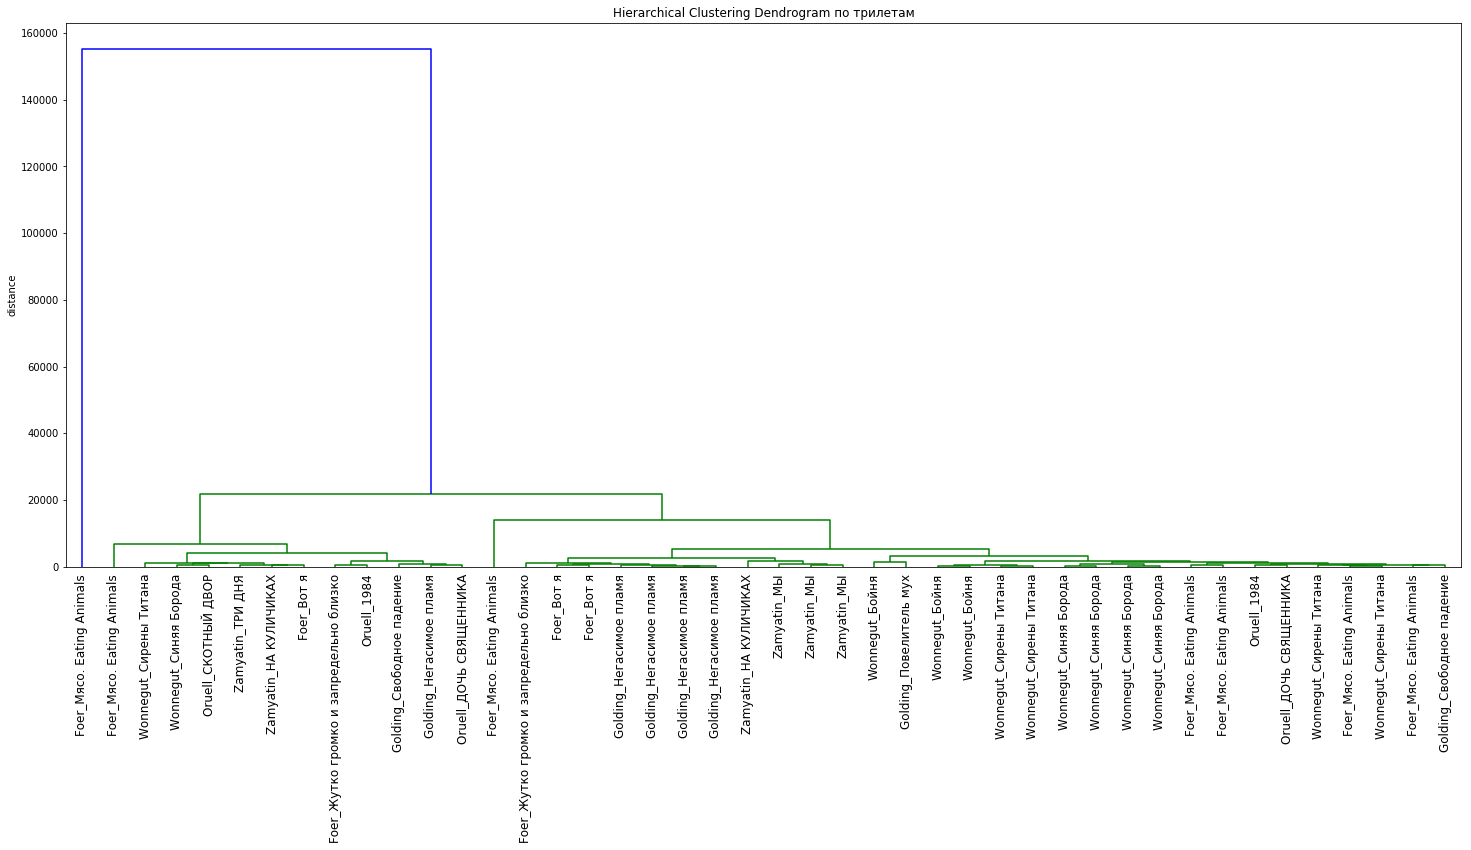

In [63]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram по трилетам')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=label_list,
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

In [64]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c

0.6063824390272567

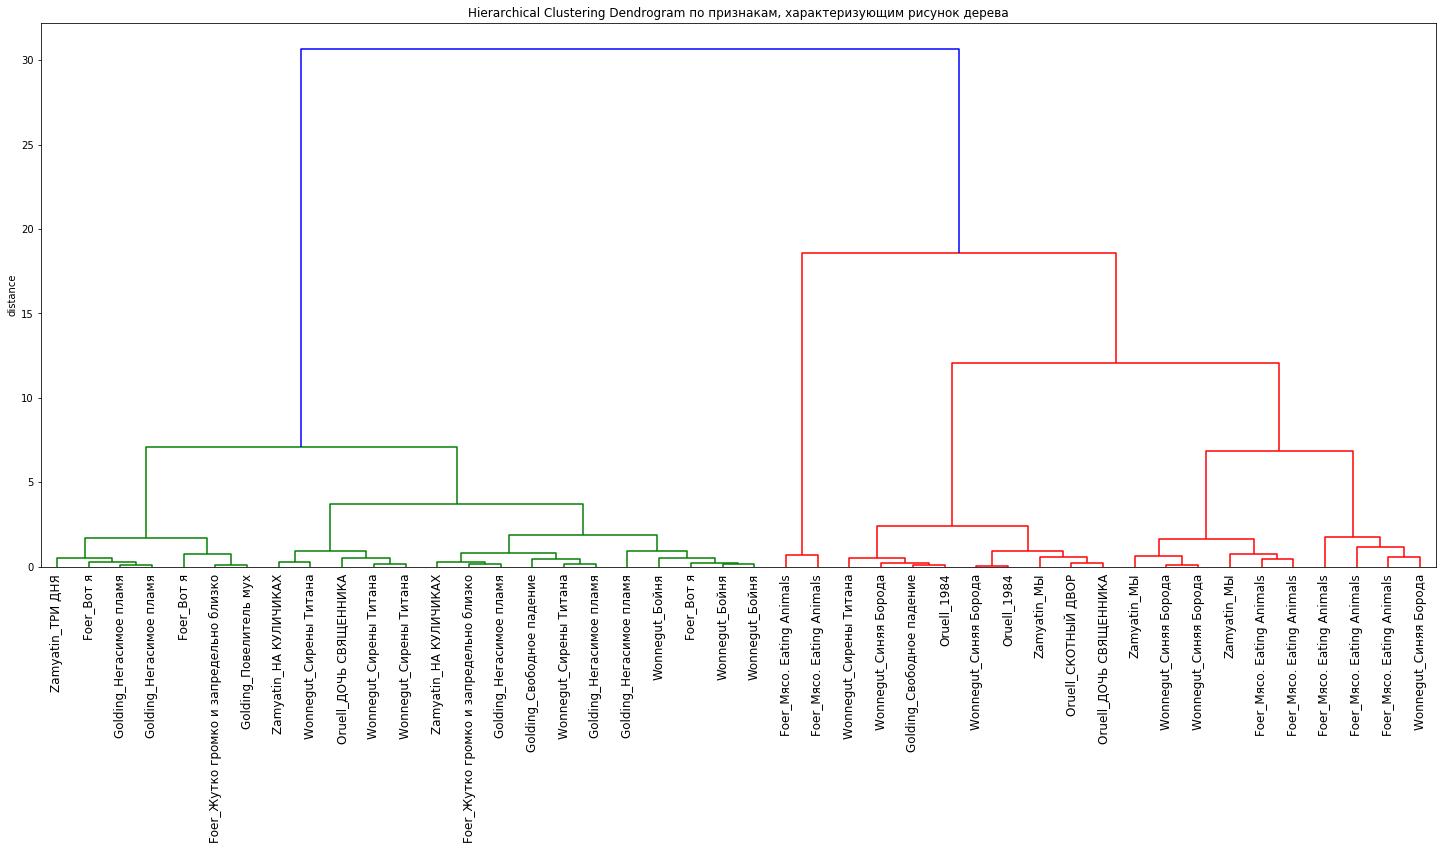

In [65]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram по признакам, характеризующим рисунок дерева')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=label_list,
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

Вывод: Наблюдаем неявное деление на три блока. Забавно, что работы Замятина относятся к разным кластерам. Именно этого автора обвиняли в списывании у Оурелла